### Question 1:  File management

In [1]:
import pandas as pd
weight_and_height=pd.read_csv('weight-and-height.csv',header=None, names = ['weight', 'height'])
weight_mean=weight_and_height.weight.mean()
height_mean=weight_and_height.height.mean()
with open('Nouralden.csv','w') as f:
    f.write(str(weight_mean)+','+str(height_mean))

### Question 2: Randomaisation  

# Specification:
### Firstly the list can't be empty 
### Secondly the chosen students must belong to AIMS
### and the list contain 50 students and the number of scholarship is 10
### The choice must be randomly and every student take <=1 scholarship

if $i\in [1,2,3,...,50]$ choose 10 numbers randomlly without repetition

In [2]:
import numpy as np
np.random.choice(50,10,replace=False) 

array([ 0, 23, 47, 31, 16, 33, 10, 49, 43, 35])

In [3]:
students=list(range(1,51))
A=[]
x=np.random.choice(students)

while len(A)<10:
    x=np.random.choice(students)
    if x not in A:
        A.append(x)
for i in range(len(A)):
    print("The scholarship {} is assigned to student number {}".format(str(i+1),str(A[i])))

The scholarship 1 is assigned to student number 23
The scholarship 2 is assigned to student number 18
The scholarship 3 is assigned to student number 33
The scholarship 4 is assigned to student number 39
The scholarship 5 is assigned to student number 13
The scholarship 6 is assigned to student number 11
The scholarship 7 is assigned to student number 43
The scholarship 8 is assigned to student number 24
The scholarship 9 is assigned to student number 34
The scholarship 10 is assigned to student number 41


### Question 3: Visualisation 

## 3.a

## $\mu= \sum_{i=1}^{n}{\frac{xi}{n}} $ if data is discrete <br>
$\mu =\sum_{i=1}^{n}{x_i * f(x_i)}$  discrete data and it's come from table

$\mu =\int_{a}^{b}{x * f(x) dx}$ for continues data

$\sigma=\sum_{i=0}^{n}{(x_i-\mu)^2 *f(x_i)}$ discrete data and it's come from table


 $\sigma=\int_{a}^{b}{(x-\mu)^2*f(x) dx}$ for continues data


## 3.b

In [147]:
y=[25.125, 14.947, 10.047, 15.725, 12.841, 14.436, 20.00, 20.221, 20.322, 23.703,
15.287, 20.659, 12.658, 13.987, 18.174, 20.179, 21.264, 5.227, 16.916, 16.658]
import numpy as np

import matplotlib.pyplot as plt
def mean1(x):
    n=len(x)
    if n==0:
        return 'The list can not be empty'
    else:
        mean=0
        for i in x:
            mean+=i
        mean/=n
    return mean
def std1(x):
    std=0
    n=len(x)
    if n==0 or n==1:
        return 0
    else:
        mean=mean1(x)
    for i in x:
        std+=(i-mean)**2
    std=(std/n-1)**.5
    return std
def testing(x,N):
    '''
    This function take a representitive sample 'x' from the 
    population with size N
    --------------------------
    Parameter:
    x: a list of float number contains the sample values
    
    N: The size of the population
    
    ----------------------------
    Return:
    the estimated mean of the population and the differnce between the actual mean and estimated mean
    and the estimated standard deviation of the population and the error
     '''
    m=mean1(x)
    s=std1(x)
    population_observation=list(np.random.normal(m,s,N))
    diff_mean=np.abs(m-mean1(population_observation))
    diff_std=np.abs(s-std1(population_observation))
    print('The sample \t\t   The population\t\t  The  erorr ')
    print('Mean {}  {} \t {} '.format(m,mean1(population_observation),diff_mean))
    print('Std  {} \t {} \t {} '.format(s,std1(population_observation),diff_std))
    #return m,s


In [148]:
testing(y,500)

The sample 		   The population		  The  erorr 
Mean 16.918799999999997  16.67084409753798 	 0.24795590246201726 
Std  4.538324884800558 	 4.494694464556938 	 0.04363042024362063 


## 3.c

 ##   The standard deviation of an item to occur with probability less than .01 is approximaitly 2.35, i.e. 2.35 $\sigma$ The following code demonstarate the result

In [114]:
def pop_pram(y,N):

    A=list(np.random.normal(np.mean(y),np.std(y),N))
    for i in np.arange(0,5,0.001):
        B=[]
        low=np.mean(A)-i*np.std(A)
        height=np.mean(A)+i*np.std(A)
        for j in A:
            if low <= j <= height:
                B.append(j)
        if len(B)/N>=.99:
            print(i)
            break

In [116]:
pop_pram(y,500)

2.331


## 3.d : The probabily of an items to within $1 \sigma$ , i.e.,$[\mu-\sigma,\mu+\sigma]$ is .68 .the following code demonstrate the result

In [126]:

N=500
A=list(np.random.normal(np.mean(y),np.std(y),N))
B=[]
low=np.mean(A)-np.std(A)
height=np.mean(A)+np.std(A)
low,height
for i in A:
    if low <= i <= height:
        B.append(i)
len(B)/N

0.68

## 3.e Since this data is representative, the mean and the standard deviation for the  population will be same regardless the population size

In [173]:
for i in [500,1000,1200,1800,2000,2500]:
    print('For the population of size %d :'%i)
    testing(y,i)
    print()

For the population of size 500 :
The sample 		   The population		  The  erorr 
Mean 16.918799999999997  16.997867844314417 	 0.07906784431441949 
Std  4.538324884800558 	 4.387317857824534 	 0.15100702697602397 

For the population of size 1000 :
The sample 		   The population		  The  erorr 
Mean 16.918799999999997  16.97595149881974 	 0.05715149881974213 
Std  4.538324884800558 	 4.146997171724043 	 0.3913277130765156 

For the population of size 1200 :
The sample 		   The population		  The  erorr 
Mean 16.918799999999997  16.93312559927059 	 0.014325599270591738 
Std  4.538324884800558 	 4.305218626414391 	 0.23310625838616783 

For the population of size 1800 :
The sample 		   The population		  The  erorr 
Mean 16.918799999999997  16.877562978220062 	 0.041237021779934935 
Std  4.538324884800558 	 4.3244992575764405 	 0.2138256272241179 

For the population of size 2000 :
The sample 		   The population		  The  erorr 
Mean 16.918799999999997  16.955197260278226 	 0.036397260278228316

## 3.f visiual representation

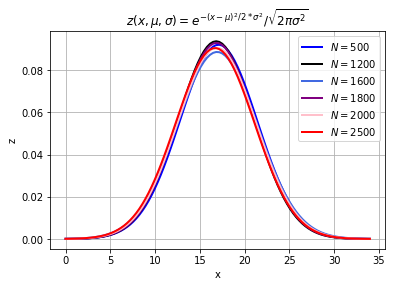

In [13]:

from numpy import sqrt, pi, exp, linspace
import matplotlib.pylab as plt

y=np.array([25.125, 14.947, 10.047, 15.725, 12.841, 14.436, 20.00, 20.221, 20.322, 23.703,
15.287, 20.659, 12.658, 13.987, 18.174, 20.179, 21.264, 5.227, 16.916, 16.658])
x= linspace(0, 34,100)
A=list(np.random.normal(mean1(y),std1(y),500))
sig=std1(A)
m=mean1(A)
y1 = 1/sqrt(2*pi*sig**2)*exp(-(x-m)**2/(2*sig**2))
A=list(np.random.normal(mean1(y),std1(y),1200))
sig=std1(A)
m=mean1(A)
y2 = 1/sqrt(2*pi*sig**2)*exp(-(x-m)**2/(2*sig**2))
A=list(np.random.normal(mean1(y),std1(y),1600))
sig=std1(A)
m=mean1(A)
y3 = 1/sqrt(2*pi*sig**2)*exp(-(x-m)**2/(2*sig**2))
A=list(np.random.normal(mean1(y),std1(y),1800))
sig=std1(A)
m=mean1(A)
y4 = 1/sqrt(2*pi*sig**2)*exp(-(x-m)**2/(2*sig**2))
A=list(np.random.normal(mean1(y),std1(y),2000))
sig=std1(A)
m=mean1(A)
y5 = 1/sqrt(2*pi*sig**2)*exp(-(x-m)**2/(2*sig**2))
A=list(np.random.normal(mean1(y),std1(y),2500))
sig=std1(A)
m=mean1(A)
y6 = 1/sqrt(2*pi*sig**2)*exp(-(x-m)**2/(2*sig**2))


fig = plt.figure()
plt.plot(x, y1, color='blue',lw=2)
plt.plot(x, y2, color='black', lw=2)
plt.plot(x, y3, color='royalblue', lw=2)
plt.plot(x, y4, color='purple', lw=2)
plt.plot(x, y5, color='pink', lw=2)
plt.plot(x, y6, color='red', lw=2)
plt.grid(True) ;
plt.legend(['$N=500  $', '$N=1200$', '$N=1600$', '$N=1800$', '$N=2000$','$N=2500$'])
plt.xlabel('x')
plt.ylabel('z')
plt.title('$z(x, \mu,\\sigma)=e^{-(x-\mu)^2/2*\\sigma^2}/\\sqrt{2\\pi\\sigma^2}$')
plt.show()

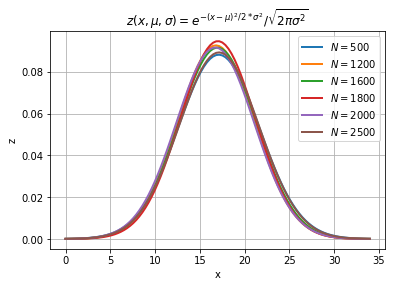

In [87]:

from numpy import sqrt, pi, exp, linspace
import matplotlib.pylab as plt

y=np.array([25.125, 14.947, 10.047, 15.725, 12.841, 14.436, 20.00, 20.221, 20.322, 23.703,
15.287, 20.659, 12.658, 13.987, 18.174, 20.179, 21.264, 5.227, 16.916, 16.658])
x= linspace(0, 34,100)
N=[500,1200,1600,1800,2000,2500]
fig = plt.figure()
for i in N:
    A=list(np.random.normal(mean1(y),std1(y),500))
    sig=std1(A)
    m=mean1(A)
    y1 = 1/sqrt(2*pi*sig**2)*exp(-(x-m)**2/(2*sig**2))
    plt.plot(x, y1,lw=2)

plt.grid(True) ;
plt.legend(['$N=500  $', '$N=1200$', '$N=1600$', '$N=1800$', '$N=2000$','$N=2500$'])
plt.xlabel('x')
plt.ylabel('z')
plt.title('$z(x, \mu,\\sigma)=e^{-(x-\mu)^2/2*\\sigma^2}/\\sqrt{2\\pi\\sigma^2}$')
plt.show()

### Question 4: Specification

## 4.a

In [73]:
f=lambda x:x**2-4

In [98]:
import numpy as np
import sympy as smp
x=smp.Symbol('x')
def newton_rafson1(x0,f,e):
    gx=smp.diff(f(x))
    x1=x0-float(f(x0)/gx.subs(x,x0))
    while np.abs(x1-x0)>e:
        x0=x1
        x1=x0-float(f(x0)/gx.subs(x,x0))
    return x1


In [77]:
newton_rafson1(1,f,1e-10)

2.0

## 4.b

## The following example the loop does not terminate, unless your initial guess very close to the solution

In [78]:
f1=lambda x:x**3-2*x+2

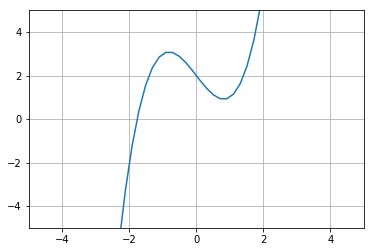

In [79]:
from numpy import linspace
import matplotlib.pyplot as plt
x=linspace(-10,10,100)
y=f1(x)
plt.plot(x,y)
plt.axis([-5,5,-5,5])
plt.grid(True)
plt.show()

## 4.c Yes, Sometimes this method return wrong answer 

In [183]:
f=lambda x: x**2+x+1

In [188]:
import numpy as np
import sympy as smp
x=smp.Symbol('x')
def newton_rafson2(x0,f,e):
    gx=smp.diff(f(x))
    x1=x0-float(f(x0)/gx.subs(x,x0))
    i=0
    while np.abs(x1-x0)>e and i<1000:
        x0=x1
        x1=x0-float(f(x0)/gx.subs(x,x0))
        i+=1
    return x1


In [189]:
newton_rafson2(1,f,1e-6)

0.0

## 4.d

In [134]:
f=lambda x: x**2-4

In [145]:
f1=lambda x: x**3-2*x+2

In [163]:
import numpy as np
import sympy as smp
x=smp.Symbol('x')
def newton_rafson3(a,b,x0,f,e):
    '''
    This function return the root of the function(linear or nonlinear) subject to this restriction:
    1- the root must be between a and b this condition checked by: f(a)*f(b)<=0
    2- if the initial guess very far from the solution, the method my be diverge and 
       will be terminated if i==1000 and if i==0 it return wron
    '''
    gx=smp.diff(f(x))
    x1=x0-float(f(x0)/gx.subs(x,x0))
    i=0
    if f(a)*f(b)<=0:
        while np.abs(x1-x0)>e and i<1000:
            x0=x1
            x1=x0-float(f(x0)/gx.subs(x,x0))
            i+=1
    if i==0:
        print('The root it is out side the interval')
    elif i==1000:
        print('The method failed to find the correct root')
    return x1 ,i 


In [164]:
newton_rafson3(-2,2,1,f,1e-6)

(2.000000000000002, 4)

In [172]:
newton_rafson3(-2,0,-2,f1,1e-6)

(-1.7692923542386998, 3)

### Question 5: Monte Carlo  

In [110]:
dx=0.0001
x=np.arange(0,np.pi,dx)
y=np.exp(np.sin(x))
sum(y)*dx

6.208765380795043

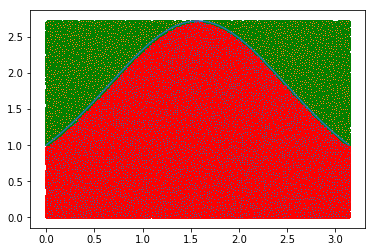

6.206508038058793

In [69]:

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(np.sin(x))
x=np.linspace(0,np.pi,100000)
y=f(x)
xmin,xmax=0,pi

xdata=np.random.uniform(xmin,xmax,100000)
ymin,ymax=0,max(f(xdata))
ydata=np.random.uniform(ymin,ymax,100000)
eye=ydata<=f(xdata)
plt.plot(x, y)
plt.scatter(xdata[eye], ydata[eye], marker=',', edgecolors='r', s=2)
plt.scatter(xdata[~eye], ydata[~eye], marker=',', edgecolors='g', s=2)
#plt.axis('off')
plt.show()
counter=np.count_nonzero(eye)
Area1=(xmax-xmin)*(ymax-ymin)*(float(counter))/100000
Area1

6.208765380795043

In [65]:
from numpy import sqrt, sin, exp, pi
import scipy.integrate as integrate
result=integrate.quad(lambda x: exp(sin(x)),0,pi);result

(6.20875803571111, 4.051169407494022e-10)

2.7182818283746064